In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist_base_path="/Users/zhouwencheng/Desktop/Grass/data/picture/mnist"
# 载入数据集
mnist = input_data.read_data_sets(mnist_base_path, one_hot=True)

W0815 22:14:54.577753 4321588096 deprecation.py:323] From <ipython-input-3-09d24b014694>:3: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0815 22:14:54.581096 4321588096 deprecation.py:323] From /Users/zhouwencheng/Desktop/Grass/02Study/02PythonEnv/envpy3.7/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0815 22:14:54.582466 4321588096 deprecation.py:323] From /Users/zhouwencheng/Desktop/Grass/02Study/02PythonEnv/envpy3.7/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (from tensorflow.contrib.learn.python

Extracting /Users/zhouwencheng/Desktop/Grass/data/picture/mnist/train-images-idx3-ubyte.gz


W0815 22:14:54.884186 4321588096 deprecation.py:323] From /Users/zhouwencheng/Desktop/Grass/02Study/02PythonEnv/envpy3.7/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0815 22:14:54.887201 4321588096 deprecation.py:323] From /Users/zhouwencheng/Desktop/Grass/02Study/02PythonEnv/envpy3.7/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0815 22:14:54.968578 4321588096 deprecation.py:323] From /Users/zhouwencheng/Desktop/Grass/02Study/02PythonEnv/envpy3.7/lib/python3.7/site-packages/tensorflow/contrib/learn/pyth

Extracting /Users/zhouwencheng/Desktop/Grass/data/picture/mnist/train-labels-idx1-ubyte.gz
Extracting /Users/zhouwencheng/Desktop/Grass/data/picture/mnist/t10k-images-idx3-ubyte.gz
Extracting /Users/zhouwencheng/Desktop/Grass/data/picture/mnist/t10k-labels-idx1-ubyte.gz


In [4]:
x = tf.placeholder(dtype=tf.float32, shape=[None, 28*28])
x_flat = tf.reshape(x, shape=[-1, 28, 28, 1])
# x_sigmoid = tf.nn.sigmoid(x_flat)

In [9]:
### 编码器--压缩
conv1 = tf.layers.conv2d(x_flat, 16, (3,3), padding='same', activation=tf.nn.relu)
# 当前shape: 28x28x16
maxpool1 = tf.layers.max_pooling2d(conv1, (2,2), (2,2), padding='same')
# 当前shape: 14x14x16
conv2 = tf.layers.conv2d(maxpool1, 8, (3,3), padding='same', activation=tf.nn.relu)
# 当前shape: 14x14x8
maxpool2 = tf.layers.max_pooling2d(conv2, (2,2), (2,2), padding='same')
# 当前shape: 7x7x8
conv3 = tf.layers.conv2d(maxpool2, 8, (3,3), padding='same', activation=tf.nn.relu)
# 当前shape: 7x7x8
encoded = tf.layers.max_pooling2d(conv3, (2,2), (2,2), padding='same')
# 当前shape: 4x4x8 

In [10]:
### 解码器--还原
upsample1 = tf.image.resize_nearest_neighbor(encoded, (7,7))
# 当前shape: 7x7x8
conv4 = tf.layers.conv2d(upsample1, 8, (3,3), padding='same', activation=tf.nn.relu)
# 当前shape: 7x7x8
upsample2 = tf.image.resize_nearest_neighbor(conv4, (14,14))
# 当前shape: 14x14x8
conv5 = tf.layers.conv2d(upsample2, 8, (3,3), padding='same', activation=tf.nn.relu)
# 当前shape: 14x14x8
upsample3 = tf.image.resize_nearest_neighbor(conv5, (28,28))
# 当前shape: 28x28x8
conv6 = tf.layers.conv2d(upsample3, 16, (3,3), padding='same', activation=tf.nn.relu)
# 当前shape: 28x28x16 

logits = tf.layers.conv2d(conv6, 1, (3,3), padding='same', activation=None)
#当前shape: 28x28x1
decoded = tf.nn.sigmoid(logits, name='decoded')

In [23]:
#计算损失函数
# loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=x_flat, logits=logits)
# cost = tf.reduce_mean(loss)

cost = tf.reduce_mean(tf.pow(x_flat - logits, 2))

#使用adam优化器优化损失函数
opt = tf.train.AdamOptimizer(0.01).minimize(cost) 

BG
epoch: 1 loss: 0.11070447
epoch: 1 loss: 0.072767735
epoch: 1 loss: 0.055394635
epoch: 1 loss: 0.050032437
epoch: 1 loss: 0.04684939
epoch: 1 loss: 0.041778013
epoch: 1 loss: 0.040105715
epoch: 1 loss: 0.039704423
epoch: 1 loss: 0.036445543
epoch: 1 loss: 0.035552274
epoch: 1 loss: 0.03345844
epoch: 1 loss: 0.03433732
epoch: 1 loss: 0.03293147
epoch: 1 loss: 0.030422177
epoch: 1 loss: 0.03096932
epoch: 1 loss: 0.03012511
epoch: 1 loss: 0.02894497
epoch: 1 loss: 0.028640613
epoch: 1 loss: 0.028663807
epoch: 1 loss: 0.032203212
epoch: 1 loss: 0.03348929
epoch: 1 loss: 0.028848818
epoch: 1 loss: 0.026814912
epoch: 1 loss: 0.02569856
epoch: 1 loss: 0.025769435
epoch: 1 loss: 0.025838863
epoch: 1 loss: 0.025335513
epoch: 1 loss: 0.024626818
epoch: 2 loss: 0.025243219
epoch: 2 loss: 0.026949765
epoch: 2 loss: 0.025641246
epoch: 2 loss: 0.024318824
epoch: 2 loss: 0.025274653
epoch: 2 loss: 0.024083735
epoch: 2 loss: 0.024941947
epoch: 2 loss: 0.02554465
epoch: 2 loss: 0.02418136
epoch: 2 l

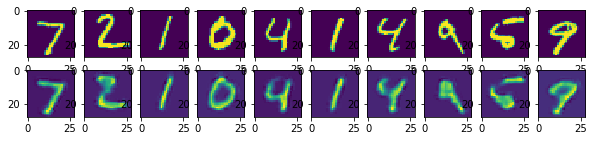

In [24]:
import matplotlib.pyplot as plt
import numpy as np

epochs = 2
batch_size = 200

# 

print("BG")
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for e in range(epochs):
        for index in range(mnist.train.num_examples//batch_size):
            x_train, y_train = mnist.train.next_batch(batch_size)  
            batch_cost, _ = sess.run([cost, opt], feed_dict={x:x_train}) 
            if index%10 == 0:
                print("epoch:", e+1, "loss:", batch_cost)
                
    # # Applying encode and decode over test set
    encode_decode = sess.run(
        logits, feed_dict={x: mnist.test.images[:10]})
    # Compare original images with their reconstructions
    f, a = plt.subplots(2, 10, figsize=(10, 2))
    for i in range(10):
        a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
        a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))
    plt.show()